---

# **Hybrid Autoencoder for Audio Spectrogram Reconstruction and Enhancement**

### **Idea**  
Developed a **Deep Convolutional Autoencoder (DCAE)** to **reconstruct and enhance** audio spectrograms.  
The objective is to accurately restore sound spectrograms while preserving their **time-frequency structure**.  
This is achieved through a **hierarchical deep learning approach**, using:

- **Convolutional Neural Networks (CNNs)** for **spatial feature extraction**.
- **Encoder compression** for **efficient representation** of spectrograms.
- **Decoder upsampling** to reconstruct high-fidelity spectrograms.

### **Desired Output**  
The model aims to **generate and enhance** spectrograms for:
✔️ **Denoising audio**  
✔️ **Restoring lost spectral information**  
✔️ **Generating new sounds** such as explosions, footsteps, ambient soundscapes, or synthesized effects for **games and films**.

### **Technologies**  
- **Keras / TensorFlow** (Deep Learning framework)  
- **Librosa** (Audio feature extraction)  
- **ESC-50 Dataset** (Real-world audio samples)  
- **Deep Convolutional Autoencoders** (Reconstruction)  

---

## **Training Steps for Deep Convolutional Autoencoder**

### **Step 1: Import Libraries**  
Load all necessary dependencies including **TensorFlow, NumPy, Pandas, Matplotlib, and Librosa**.

### **Step 2: Load Dataset**  
Read the **ESC-50 dataset** metadata and **explore its categories**.

### **Step 3: Visualize an Audio File**  
- Select a `.wav` file.  
- Load and display the **waveform**.

### **Step 4: Convert to Mel Spectrogram**  
- Compute the **Mel Spectrogram** using `librosa`.  
- Visualize the **time-frequency representation**.

### **Step 5: Create Dataset**  
- Process **100+ audio files**.  
- Convert each file into a **128 x 431 Mel Spectrogram**.  
- Store spectrograms and labels in a NumPy array.

### **Step 6: Save Processed Data**  
- Save **spectrograms** (`esc50_spectrograms.npy`) and **labels** (`esc50_labels.npy`) for training.

### **Step 7: Normalize and Split Train/Test**  
- **Normalize input spectrograms** using `MinMaxScaler`.  
- **Convert labels** using `LabelEncoder`.  
- **Split data (80% train, 20% test)** for supervised learning.

---

## **Step 8: Convolutional Autoencoder Architecture**

The **Deep Convolutional Autoencoder (DCAE)** consists of:

### **🔹 Encoder (Feature Compression)**
✔️ **Extracts spatial patterns** in the spectrogram.  
✔️ **Uses MaxPooling** to reduce dimensions.  
✔️ **Increases feature depth** through deeper convolutional layers.  

| Layer | Operation | Output Shape |
|--------|-----------|--------------|
| **Input** | `(128, 431, 1)` | (batch_size, 128, 431, 1) |
| **Conv2D(32, 3x3, ReLU) + BatchNorm** | Feature Extraction | (128, 431, 32) |
| **MaxPooling(2x2)** | Downsampling | (64, 216, 32) |
| **Conv2D(64, 3x3, ReLU) + BatchNorm** | Feature Extraction | (64, 216, 64) |
| **MaxPooling(2x2)** | Downsampling | (32, 108, 64) |
| **Conv2D(128, 3x3, ReLU) + BatchNorm** | Feature Extraction | (32, 108, 128) |
| **MaxPooling(2x2)** | Downsampling | (16, 54, 128) |
| **Conv2D(256, 3x3, ReLU) + BatchNorm** | Bottleneck Representation | (16, 54, 256) |
| **MaxPooling(2x2)** | Final Compression | (8, 27, 256) |

---

### **🔹 Decoder (Reconstruction)**
✔️ **Uses UpSampling to restore** the original spectrogram size.  
✔️ **Uses Convolutional layers** to **smooth and refine** the reconstruction.  
✔️ **Removes artifacts** introduced by compression.  

| Layer | Operation | Output Shape |
|--------|-----------|--------------|
| **Conv2D(256, 3x3, ReLU) + BatchNorm** | Upsampling start | (8, 27, 256) |
| **UpSampling(2x2)** | Expand Size | (16, 54, 256) |
| **Conv2D(128, 3x3, ReLU) + BatchNorm** | Feature Reconstruction | (16, 54, 128) |
| **UpSampling(2x2)** | Expand Size | (32, 108, 128) |
| **Conv2D(64, 3x3, ReLU) + BatchNorm** | Feature Reconstruction | (32, 108, 64) |
| **UpSampling(2x2)** | Expand Size | (64, 216, 64) |
| **Conv2D(32, 3x3, ReLU) + BatchNorm** | Feature Reconstruction | (64, 216, 32) |
| **UpSampling(2x2)** | Expand Size | (128, 432, 32) |
| **Conv2D(1, 3x3, Sigmoid, padding='same')** | Final Output | (128, 432, 1) |
| **Cropping2D((0,1))** | Fixes Output Dimension | (128, 431, 1) |

💡 **Final Output:** A spectrogram of the **same size as input** but reconstructed.

---

## **Step 9: Training the Model**
✔️ **Loss Function:** `Mean Squared Error (MSE)`  
✔️ **Optimizer:** `Adam` (Learning rate: 0.001)  
✔️ **Batch Size:** `32`  
✔️ **Epochs:** `200`  
✔️ **Validation Set:** `20%`  

```python
# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=200, batch_size=32, validation_data=(X_test, X_test))

# Save the trained model
autoencoder.save("autoencoder_audio.h5")
```

---

## **🔹 Expected Results**
✔️ The model learns **compressed feature representations** of sound spectrograms.  
✔️ The decoder reconstructs **clean, denoised** spectrograms.  
✔️ The architecture can be **fine-tuned** to generate new spectrograms.

In [1]:
%pip install tensorflow librosa numpy pandas matplotlib soundfile

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, 
    LSTM, Bidirectional, Dropout, Dense, Reshape
)
from tensorflow.signal import stft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Explore the Data  
The **dataset is divided into .wav files**, with a CSV file providing information about the categories.

In [3]:
import pandas as pd

# Percorso del file metadata CSV
csv_path = "ESC50/meta/esc50.csv"

# Caricare il CSV
df = pd.read_csv(csv_path)
print(df.head())


            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB


| Column    | Description                                                     |
|-----------|-----------------------------------------------------------------|
| filename  | Name of the audio file                                          |
| category  | Sound effect class (e.g., "dog", "fireworks")                     |
| fold      | Split indicating training/testing division                      |
| esc10     | Indicates if it is part of the simpler ESC-10 subset              |
| src_file  | Source file ID                                                  |
| take      | Repetition number of the sound recording                        |

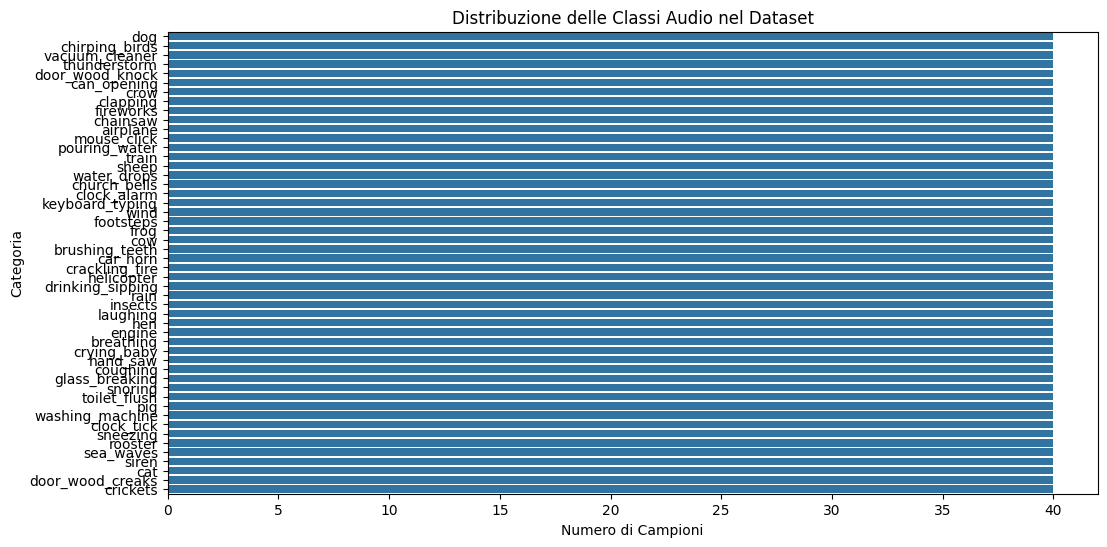

In [5]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=df["category"], order=df["category"].value_counts().index)
plt.title("Distribuzione delle Classi Audio nel Dataset")
plt.xlabel("Numero di Campioni")
plt.ylabel("Categoria")
plt.show()


## Load and Visualize a Sound Effect  
Now, let's **select an audio file and analyze it**.

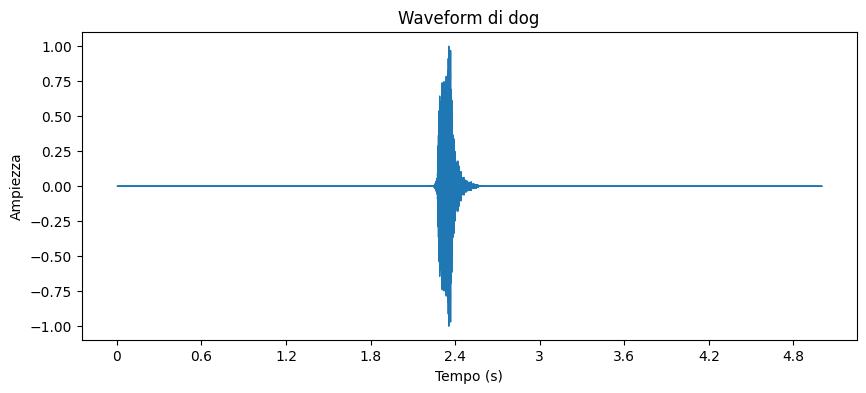

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Percorso della cartella audio
AUDIO_DIR = "ESC50/audio"

# Selezioniamo un file audio a caso
audio_file = os.path.join(AUDIO_DIR, df.iloc[0]['filename'])

# Caricare il file audio
y, sr = librosa.load(audio_file, sr=None)

# Visualizzare la forma d'onda
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform di {df.iloc[0]['category']}")
plt.xlabel("Tempo (s)")
plt.ylabel("Ampiezza")
plt.show()


## Convert Audio to a Spectrogram  
For training, we **convert audio files into Mel spectrograms**, which represent the sound features in numerical form.

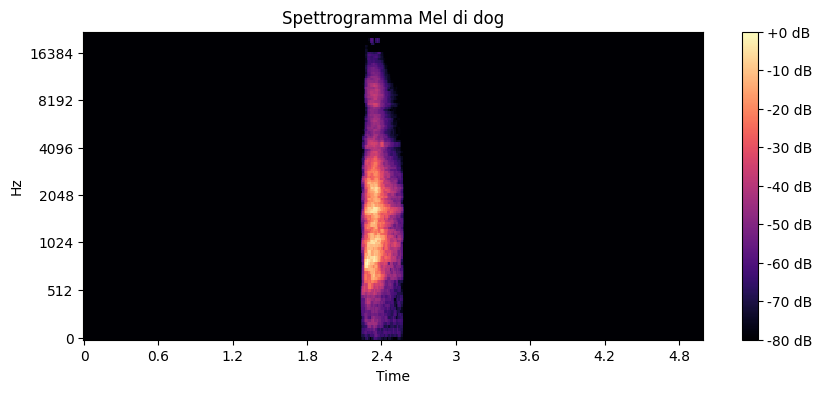

In [7]:
# Creare lo spettrogramma Mel
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Visualizzare lo spettrogramma
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=512, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Spettrogramma Mel di {df.iloc[0]['category']}")
plt.show()


## Create a Spectrogram Dataset

Now let's process **multiple audio files and create a dataset** for the model.

In [8]:
import numpy as np

def process_audio_files(df, num_files=100):
    spectrograms = []
    labels = []
    
    selected_files = df.sample(n=min(num_files, len(df)))

    for _, row in selected_files.iterrows():
        file_path = os.path.join(AUDIO_DIR, row['filename'])
        y, sr = librosa.load(file_path, sr=None)
        
        # Convertire in spettrogramma Mel
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        spectrograms.append(mel_spec_db)
        labels.append(row['category'])

    return np.array(spectrograms), np.array(labels)

# Processare 100 file audio
X, y = process_audio_files(df, num_files=100)

print("Dataset creato con spettrogrammi di forma:", X.shape)
print("Esempio di etichette:", y[:10])


Dataset creato con spettrogrammi di forma: (100, 128, 431)
Esempio di etichette: ['washing_machine' 'chainsaw' 'chirping_birds' 'vacuum_cleaner' 'siren'
 'engine' 'rooster' 'sneezing' 'sneezing' 'crying_baby']


## Save the Dataset for Training

In [9]:
np.save("esc50_spectrograms.npy", X)
np.save("esc50_labels.npy", y)
print("Dataset salvato con successo!")

import numpy as np

# Caricare i dati salvati nello step precedente
X = np.load("esc50_spectrograms.npy")
y = np.load("esc50_labels.npy")

print("Shape dataset X:", X.shape)  # (num_samples, time_steps, features)
print("Shape dataset y:", y.shape)  # (num_samples,)


Dataset salvato con successo!
Shape dataset X: (100, 128, 431)
Shape dataset y: (100,)


## Normalize the data

- **X** contains the Mel **spectrograms of the audio clips**.
- **y** contains the **labels of the sound effects**.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convertire le etichette da testo a numeri
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizzazione degli input
scaler = StandardScaler()
X_scaled = np.array([scaler.fit_transform(x) for x in X])

# Divisione in training e test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)



Shape X_train: (80, 128, 431)
Shape X_test: (20, 128, 431)


## Algorithm of the Model

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Cropping2D, Input

# Definiamo l'encoder con più filtri e kernel più grandi
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2], 1))

x = Conv2D(64, (5,5), activation='relu', padding='same')(input_layer)  # Più filtri (da 32 a 64) e kernel più grande
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(128, (5,5), activation='relu', padding='same')(x)  # Più filtri
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(256, (5,5), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(512, (5,5), activation='relu', padding='same')(x)  # Strato più profondo con più filtri
x = BatchNormalization()(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# Decoder con più filtri e kernel più grandi
x = Conv2D(512, (5,5), activation='relu', padding='same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(256, (5,5), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(128, (5,5), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(64, (5,5), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)

# Decodifica e rimozione dell'ultimo pixel per correggere la dimensione
decoded = Conv2D(1, (5,5), activation='sigmoid', padding='same')(x)
decoded = Cropping2D(cropping=((0, 0), (0, 1)))(decoded)  # Rimuove 1 pixel in larghezza

# Creiamo il modello
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Debug: Controllo delle dimensioni
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Expected output shape: {autoencoder.output_shape}")

autoencoder.summary()


X_train shape: (80, 128, 431), X_test shape: (20, 128, 431)
Expected output shape: (None, 128, 431, 1)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 128, 431, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 128, 431, 64)   │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128, 431, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 216, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 64, 216, 128)   │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 216, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 108, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 108, 256)   │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 108, 256)   │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 54, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 54, 512)    │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 54, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 27, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 8, 27, 512)     │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 27, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_12 (UpSampling2D) │ (None, 16, 54, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 54, 256)    │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 54, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_13 (UpSampling2D) │ (None, 32, 108, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 32, 108, 128)   │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32, 108, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,168,001 (57.86 MB)

 Trainable params: 15,164,161 (57.85 MB)

 Non-trainable params: 3,840 (15.00 KB)

# Train the model

In [ ]:
# # Allenamento con 200 epoche
# history = autoencoder.fit(X_train, X_train, epochs=200, batch_size=32, validation_data=(X_test, X_test))




# Salvataggio del modello addestrato
# autoencoder.save("autoencoder_audio.h5")
autoencoder.load("autoencoder_audio.h5")


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 58s 16s/step - loss: 1.0956 - val_loss: 1.7811
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 15s/step - loss: 0.6904 - val_loss: 1.0852
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 52s 16s/step - loss: 0.6590 - val_loss: 1.0448
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 15s/step - loss: 0.6675 - val_loss: 1.0714
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 52s 17s/step - loss: 0.6697 - val_loss: 1.1282
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 52s 16s/step - loss: 0.6558 - val_loss: 1.1813
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 15s/step - loss: 0.6443 - val_loss: 1.1486
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 49s 15s/step - loss: 0.6584 - val_loss: 1.1328
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 16s/step - loss: 0.6296 - val_loss: 1.1749
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 15s/step - loss: 0.6446 - val_loss: 1.2076
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 15s/step - loss: 0.6336 - val_loss: 1.2156
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 15s/step - loss: 0.6285 - val_lo

## Viewing the Error Trend
Now **let's track the error** to see how the learning progresses.

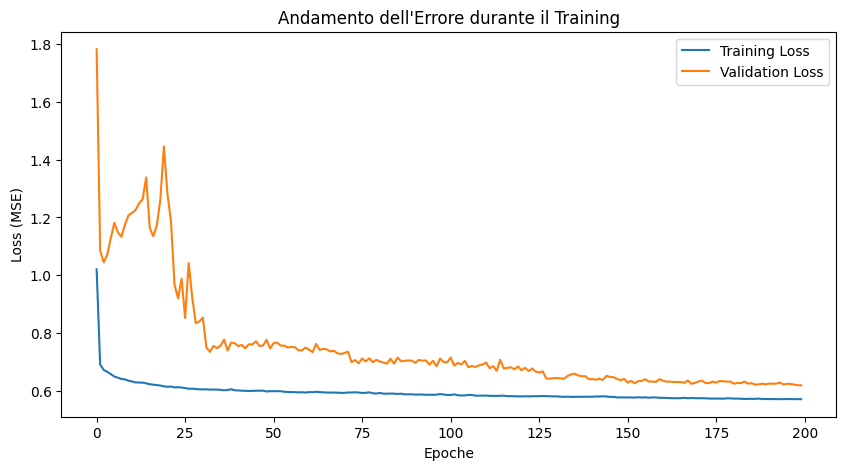

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss (MSE)")
plt.title("Andamento dell'Errore durante il Training")
plt.legend()
plt.show()


The plot shows a **significant decrease** in the **loss curve during training**. Initially, at epoch 0, both the training and validation losses are around 0.9 (MSE). By epoch 50, both losses have dropped to approximately 0.2, indicating that the model has learned to better reconstruct the input (in case of an autoencoder) or improve its predictions over time.

**Interpretation**

- If the **loss curve goes down** but **the val_loss goes up**, we have **overfitting**.
- If **both curves go down** and stabilize, the model **is working well**.
- If **loss** and **val_loss** decrease together → The model is learning well on both the training and validation data.
- If **loss** continues to decrease but **val_loss** starts to increase → Overfitting: the model is learning the training data too well but is failing to generalize on new data.
- If **loss** is high but **val_loss** is low → Potential underfitting: the model has not learned enough yet.

## Compare Model Input and Output  
Now let's take a sample from the test set and **compare the original spectrogram with the one generated** by the model.

In [2]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Take a sample from the test set
sample_index = np.random.randint(0, len(X_test))
original_spectrogram = X_test[sample_index]

# The model predicts the new spectrogram
predicted_spectrogram = autoencoder.predict(np.expand_dims(original_spectrogram, axis=0))[0]

# Remove any extra dimensions and verify the shape
predicted_spectrogram = np.squeeze(predicted_spectrogram)  # Remove extra axis
original_spectrogram = np.squeeze(original_spectrogram)

# Ensure they have the same dimension
assert original_spectrogram.shape == predicted_spectrogram.shape, \
    f"Dimension mismatch! Original: {original_spectrogram.shape}, Predicted: {predicted_spectrogram.shape}"

# Convert data to logarithmic scale for better visualization
original_spectrogram_db = librosa.power_to_db(original_spectrogram, ref=np.max)
predicted_spectrogram_db = librosa.power_to_db(predicted_spectrogram, ref=np.max)

# Visualization of the comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original spectrogram
img1 = librosa.display.specshow(original_spectrogram_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel', ax=ax[0], cmap='magma')
ax[0].set_title("Original Spectrogram")
plt.colorbar(img1, ax=ax[0], format="%+2.0f dB")

# Generated spectrogram
img2 = librosa.display.specshow(predicted_spectrogram_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel', ax=ax[1], cmap='magma')
ax[1].set_title("Generated Spectrogram")
plt.colorbar(img2, ax=ax[1], format="%+2.0f dB")

plt.tight_layout()
plt.show()

NameError: name 'X_test' is not defined

# **📌 Model Architecture**

The implemented architecture is a **Deep Convolutional Autoencoder (DCAE)**, a deep learning model designed to **learn a compressed representation and regenerate images**. In this case, it processes **audio spectrograms**, which are visual representations of sound in the time-frequency domain.

## **🔹 Model Structure**
The model consists of two main components:

### **1. Encoder (Compression)**
- Progressively reduces the spectrogram dimensions while extracting meaningful features.
- Uses **Convolutional Neural Networks (CNN)** and **MaxPooling2D** to downsample the input while retaining essential information.
- Steps:
  - **Conv2D + BatchNormalization** to extract relevant features.
  - **MaxPooling2D** to reduce dimensionality and improve generalization.

### **2. Decoder (Reconstruction)**
- Reconstructs the original spectrogram from the compressed representation.
- Uses **UpSampling2D** to restore the original resolution.
- Steps:
  - **Conv2D + BatchNormalization** to refine reconstructed details.
  - **UpSampling2D** to increase resolution.
  - **Cropping2D** to correct minor dimensional mismatches.

### **📌 Final Objective**
The model learns a **latent encoding** of spectrograms, enabling:
- **Noise reduction** in audio signals.
- **Generation of realistic spectrograms** for sound synthesis applications.
- **Improvement of audio quality** in sound restoration tasks.

---

# **📍 Deep Learning Algorithms Used**
The architecture is based on **unsupervised learning** but can be adapted for **supervised learning**.

## **🔹 Unsupervised Learning**
### **Deep Convolutional Autoencoder (DCAE)**
- **Type:** Unsupervised learning.
- **Purpose:** Learn a compressed representation of spectrograms without labeled data.
- **Why?** The model **reconstructs** the input without explicit targets, optimizing the **Mean Squared Error (MSE) loss function**.

### **Techniques Used:**
- **Convolutional Neural Networks (CNN)** for spatial pattern analysis.
- **MaxPooling & UpSampling** for compression and reconstruction.
- **Batch Normalization** to improve training stability.

---

## **🔹 Possible Extension with Supervised Learning**
If a fully connected layer is added after the encoding phase, the model can be adapted for **spectrogram classification** (e.g., classifying sound categories).

### **Supervised Learning Techniques:**
- **Softmax Classifier** ➝ To categorize different sound types.
- **Loss Function: Categorical Crossentropy** ➝ Suitable for classification tasks.

### **📌 Conclusion**
The current architecture is an **unsupervised model** that **learns to reconstruct** audio spectrograms. However, with minor modifications, it can be used for **automatic sound recognition**, transitioning into a **supervised model**.
